# Data Science Capstone Data Analysis (Prompt 3)

Miguel Arredondo

Professor Clark

2 December 2024

DATA 4950

# Part 1: EDA

In [ ]:
#import the libraries and packages required for analysis
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
%matplotlib inline
import scipy.stats as stats

#allows for up to 500 columns to be displayed when viewing a dataframe
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',3000)

#ignore warning messages
import warnings
warnings.filterwarnings("ignore")


#### Import data

In [ ]:
#import the car sales data file
car_sales = pd.read_csv("CarSales_Small.csv")
#get the top five rows
car_sales.head()

,Unnamed: 0,city,bed,body_type,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,engine_type,exterior_color,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,is_new,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make,maximum_seating,mileage,model,owner_count,price,salvage,savings_amount,seller_rating,theft_title,torque,transmission_display,vehicle_damage_category,wheel_system_display,wheelbase,width,year
0,273335,Denver,NaN,Pickup Truck,NaN,NaN,66.0,80231.0,8.0,NaN,V8,Grey,False,False,NaN,NaN,NaN,Gasoline,False,NaN,NaN,NaN,Black,False,39.6802,NaN,7/8/2020,GRAY,275999568.0,-104.9030,https://static.cargurus.com/images/forsale/202...,['Steel Wheels'],Toyota,NaN,194490.0,Tundra,3.0,13900.0,False,766.0,4.571429,False,NaN,6-Speed Automatic Overdrive,NaN,NaN,NaN,NaN,2008.0
1,129041,Las Vegas,NaN,Sedan,23.0,NaN,66.0,89146.0,4.0,2000.0,I4,Wave Metallic,NaN,True,Cadillac,42.4 in,17.4,Gasoline,NaN,57.2,32.0,237.0,Jet Black with Jet Black Accents,True,36.1443,193.8,7/7/2020,UNKNOWN,275926401.0,-115.2100,https://static.cargurus.com/images/forsale/202...,"['Leather Seats', 'Sunroof/Moonroof', 'Alloy W...",Cadillac,5.0,14.0,CT5,NaN,43960.0,NaN,0.0,4.387097,NaN,405.0,Automatic,NaN,Rear-Wheel Drive,116.0,80.3,2020.0
2,391889,Scottsdale,NaN,SUV / Crossover,17.0,NaN,92.0,85257.0,6.0,3500.0,V6,Shadow Black,False,True,Mitsubishi,42.9 in,18.6,Gasoline,False,70.0,24.0,290.0,Ebony Black,False,33.4657,198.3,6/11/2020,BLACK,273843787.0,-111.9310,https://static.cargurus.com/images/forsale/202...,"['Leather Seats', 'Navigation System', 'Alloy ...",Ford,7.0,30260.0,Explorer,1.0,27300.0,False,358.0,4.132075,False,255.0,6-Speed Automatic,NaN,Front-Wheel Drive,112.8,90.2,2017.0
3,190885,Orlando,NaN,Sedan,28.0,NaN,100.0,32809.0,4.0,NaN,I4,Slate Metallic,False,False,NaN,NaN,NaN,Gasoline,False,NaN,35.0,NaN,Black,False,28.4499,NaN,6/6/2020,UNKNOWN,273455328.0,-81.3481,https://static.cargurus.com/images/forsale/202...,"['LE Package', 'Leather Seats', 'Sunroof/Moonr...",Toyota,NaN,35843.0,Corolla,1.0,15198.0,False,870.0,3.471264,False,NaN,Continuously Variable Transmission,NaN,Front-Wheel Drive,NaN,NaN,2018.0
4,240480,Cincinnati,NaN,Hatchback,30.0,NaN,9.0,45249.0,4.0,1400.0,I4,Red Hot,NaN,True,Chevrolet,41.7 in,9.0,Gasoline,NaN,58.4,38.0,98.0,Jet Black,True,39.2980,143.1,9/2/2020,RED,281026036.0,-84.3073,https://static.cargurus.com/images/forsale/202...,"['Steel Wheels', 'Backup Camera', 'Android Aut...",Chevrolet,4.0,2.0,Spark,NaN,15495.0,NaN,0.0,3.764706,NaN,NaN,Continuously Variable Transmission,NaN,Front-Wheel Drive,93.9,62.8,2021.0


#### Check the structure of the data

In [ ]:
#get the variable information
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215646 entries, 0 to 215645
Data columns (total 49 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               215646 non-null  int64  
 1   city                     206239 non-null  object 
 2   bed                      1575 non-null    object 
 3   body_type                205308 non-null  object 
 4   city_fuel_economy        173883 non-null  float64
 5   combine_fuel_economy     0 non-null       float64
 6   daysonmarket             206239 non-null  float64
 7   dealer_zip               206239 non-null  float64
 8   engine_cylinders         199075 non-null  float64
 9   engine_displacement      194191 non-null  float64
 10  engine_type              199075 non-null  object 
 11  exterior_color           206234 non-null  object 
 12  frame_damaged            111298 non-null  object 
 13  franchise_dealer         206239 non-null  object 
 14  fran

From  the information given above about the data we see that there are some variables with missing values. We have 215646 observations with 49 coulmns where out of the 49 we have 26 which are numeric and 23 which are categorical in nature.

#### Summary statistics

In [ ]:
#get measures for different quantitative variables in the file
car_sales.describe()

,Unnamed: 0,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,engine_cylinders,engine_displacement,fuel_tank_volume,height,highway_fuel_economy,horsepower,latitude,length,listing_id,longitude,maximum_seating,mileage,owner_count,price,savings_amount,seller_rating,torque,vehicle_damage_category,wheelbase,width,year
count,215646.000000,173883.000000,0.0,206239.000000,206239.000000,199075.000000,194191.000000,195228.000000,195290.000000,173883.000000,194191.000000,206239.000000,195290.000000,2.062390e+05,206239.000000,195288.000000,1.946380e+05,105550.000000,2.062390e+05,206239.000000,203682.000000,171797.000000,0.0,195293.000000,195289.000000,206239.000000
mean,197765.899952,22.906236,NaN,72.268751,60541.894322,5.099314,2931.007101,18.382488,65.279461,29.817872,245.658367,33.758350,192.675968,2.758250e+08,-93.507629,5.464519,3.356656e+04,1.597631,2.918536e+04,568.963460,4.175650,261.121713,NaN,114.577910,77.937246,2017.664385
std,116626.459433,8.919506,NaN,105.494817,22907.971825,1.455084,1323.144240,5.307320,7.521644,7.932900,91.235857,4.473902,19.554525,8.633937e+06,11.756464,1.200322,2.313295e+05,0.996680,2.080288e+04,1157.984763,0.511172,116.449931,NaN,13.855171,7.504014,4.179741
min,1.000000,8.000000,NaN,0.000000,1104.000000,2.000000,700.000000,1.900000,43.900000,11.000000,70.000000,25.596100,106.100000,1.121130e+08,-123.014000,2.000000,0.000000e+00,1.000000,3.869000e+02,0.000000,1.000000,68.000000,NaN,73.500000,55.000000,1923.000000
25%,96970.750000,18.000000,NaN,14.000000,33619.000000,4.000000,2000.000000,14.500000,57.900000,25.000000,172.000000,29.767000,181.900000,2.750523e+08,-98.547500,5.000000,7.000000e+00,1.000000,1.740800e+04,0.000000,3.930233,176.000000,NaN,106.300000,72.400000,2017.000000
50%,193422.000000,22.000000,NaN,34.000000,73139.000000,4.000000,2500.000000,17.400000,66.000000,29.000000,241.000000,33.508300,189.800000,2.787453e+08,-95.411500,5.000000,1.243900e+04,1.000000,2.508600e+04,0.000000,4.259259,258.000000,NaN,111.000000,75.800000,2020.000000
75%,298864.750000,26.000000,NaN,77.000000,78729.000000,6.000000,3600.000000,21.000000,69.900000,34.000000,300.000000,37.323500,198.800000,2.805712e+08,-82.505500,6.000000,4.626800e+04,2.000000,3.711550e+04,812.000000,4.515152,295.000000,NaN,117.900000,82.500000,2020.000000
max,404357.000000,127.000000,NaN,1970.000000,97477.000000,16.000000,8400.000000,63.500000,117.600000,127.000000,1001.000000,45.637400,294.100000,2.819959e+08,-69.805800,15.000000,9.999999e+07,12.000000,1.750000e+06,130021.000000,5.000000,935.000000,NaN,204.500000,109.000000,2021.000000


The summary statistics are for the numeric variables

#### Plot all the numeric variables

<Figure size 576x288 with 0 Axes>

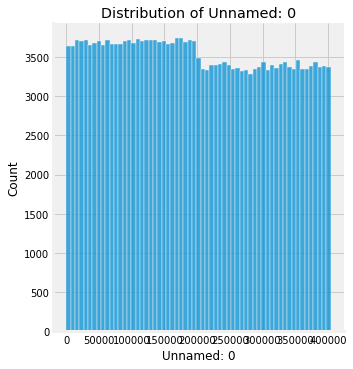

<Figure size 576x288 with 0 Axes>

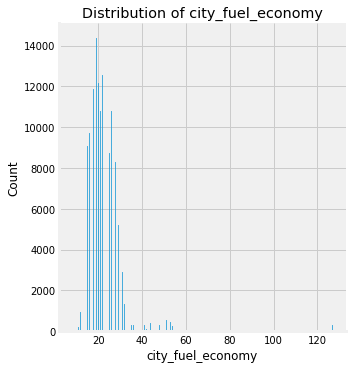

<Figure size 576x288 with 0 Axes>

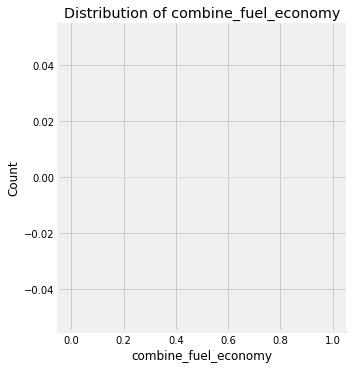

<Figure size 576x288 with 0 Axes>

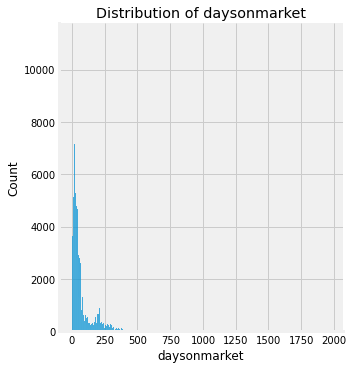

<Figure size 576x288 with 0 Axes>

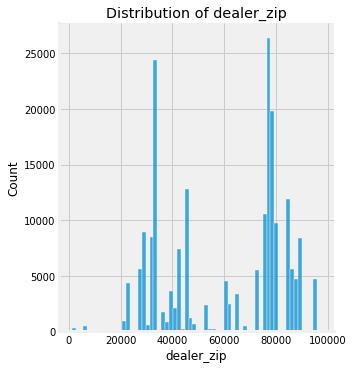

<Figure size 576x288 with 0 Axes>

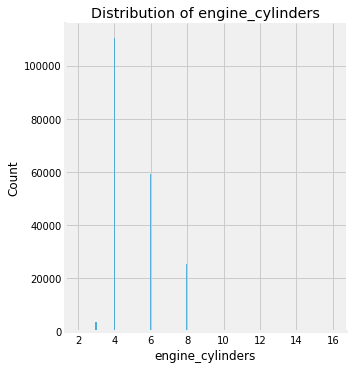

<Figure size 576x288 with 0 Axes>

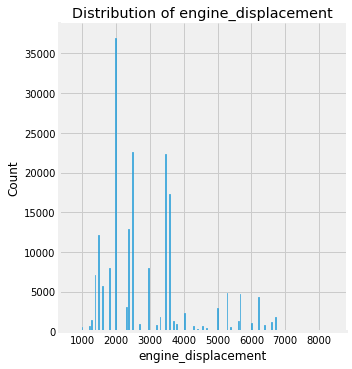

<Figure size 576x288 with 0 Axes>

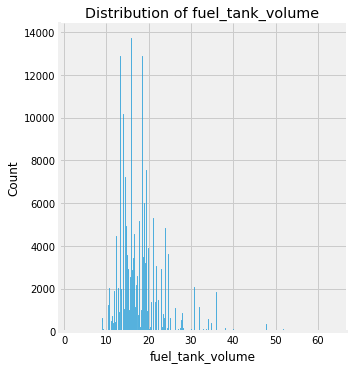

<Figure size 576x288 with 0 Axes>

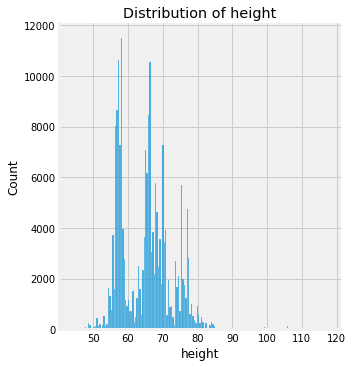

<Figure size 576x288 with 0 Axes>

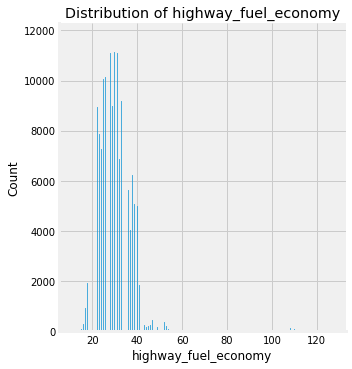

<Figure size 576x288 with 0 Axes>

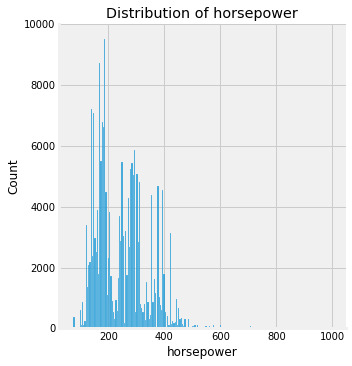

<Figure size 576x288 with 0 Axes>

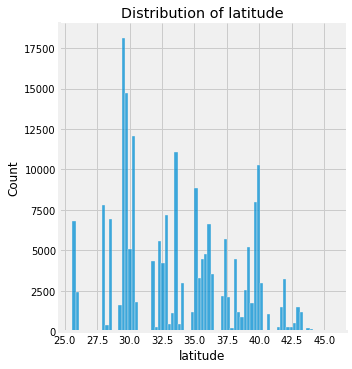

<Figure size 576x288 with 0 Axes>

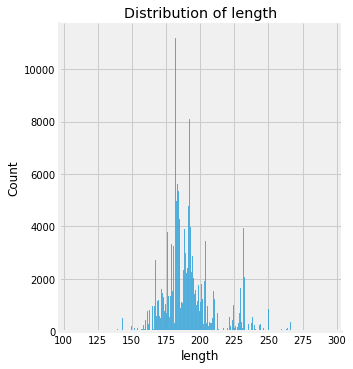

<Figure size 576x288 with 0 Axes>

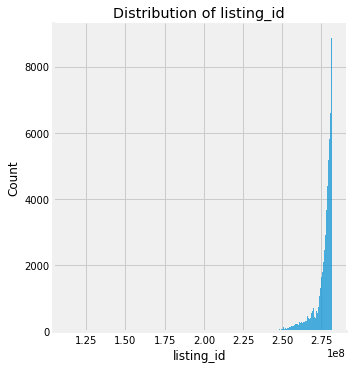

<Figure size 576x288 with 0 Axes>

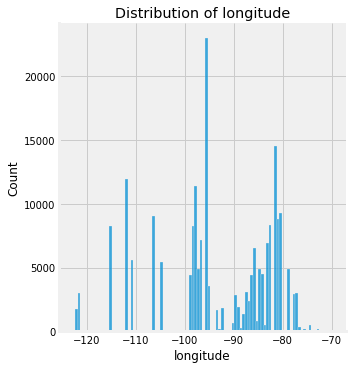

<Figure size 576x288 with 0 Axes>

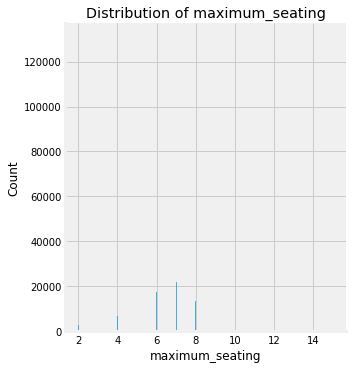

<Figure size 576x288 with 0 Axes>

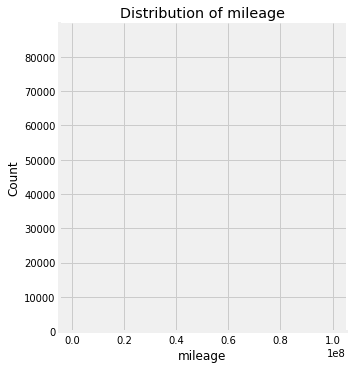

<Figure size 576x288 with 0 Axes>

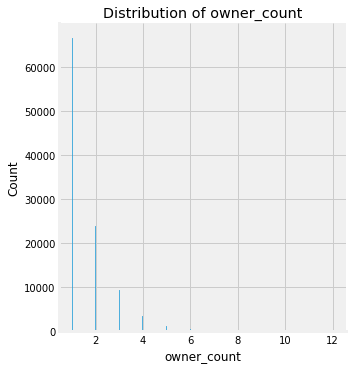

<Figure size 576x288 with 0 Axes>

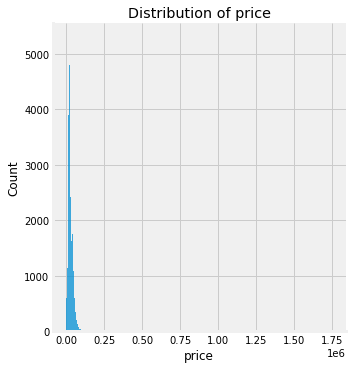

<Figure size 576x288 with 0 Axes>

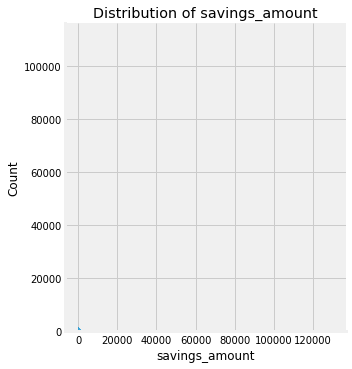

<Figure size 576x288 with 0 Axes>

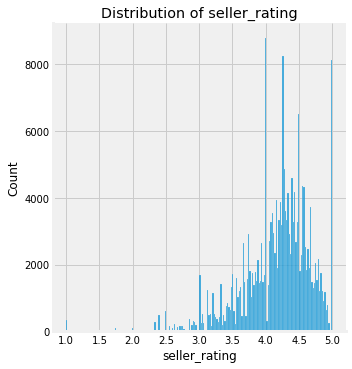

<Figure size 576x288 with 0 Axes>

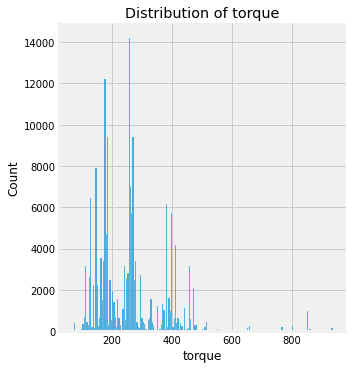

<Figure size 576x288 with 0 Axes>

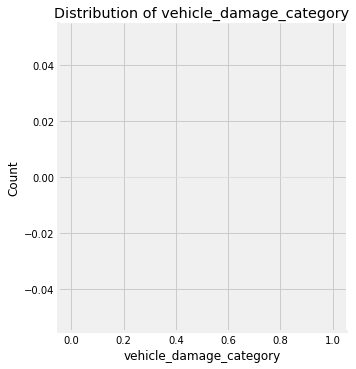

<Figure size 576x288 with 0 Axes>

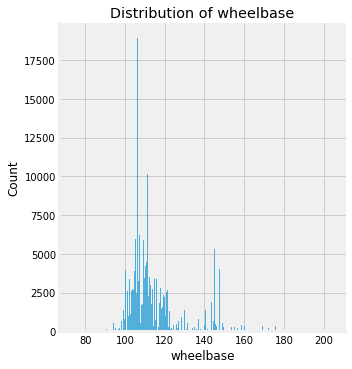

<Figure size 576x288 with 0 Axes>

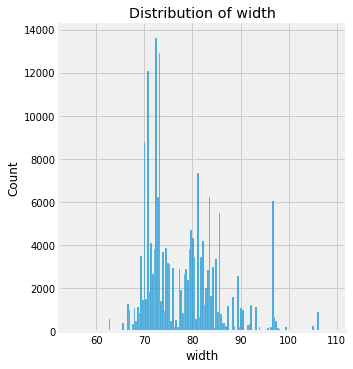

<Figure size 576x288 with 0 Axes>

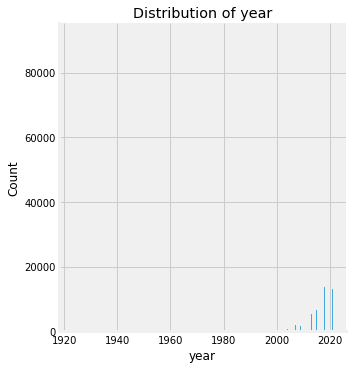

In [ ]:
#creates a loop for each column in a data to be plotted
for col in car_sales:
    if car_sales[col].dtype == 'int64' or car_sales[col].dtype == 'float64':
        plt.figure(figsize=(8, 4))
        sns.displot(car_sales[col])
        plt.title(f'Distribution of {col}')
        plt.show()

The histograms give the distribution of all the numeric variables and as we acn see some of the variables have empty entries and most of them like city fuel economy are skewed. None of the variables are normally distributed.

#### Distribution of all categorical variables

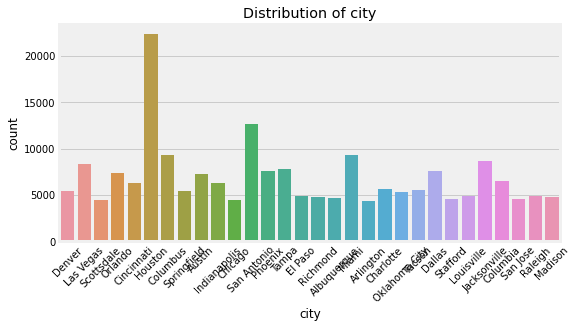

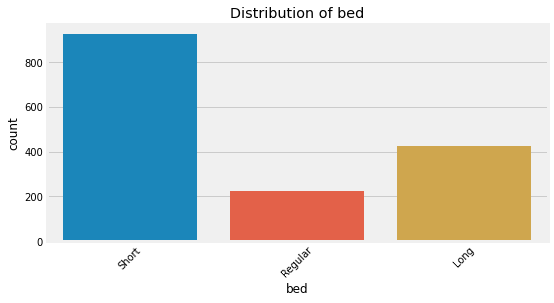

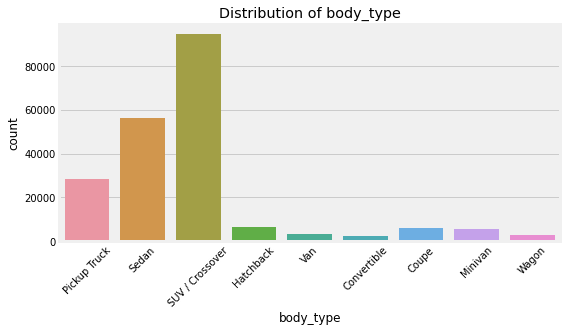

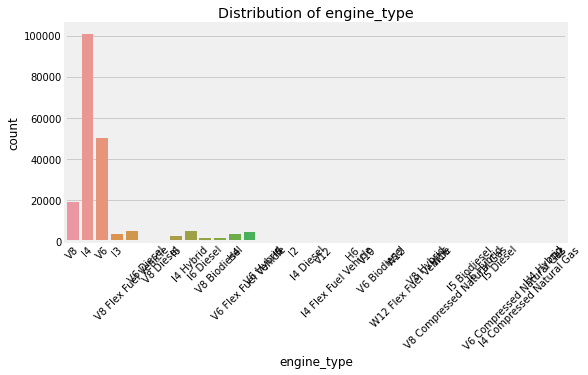

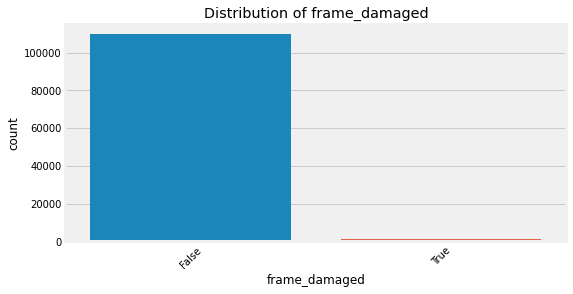

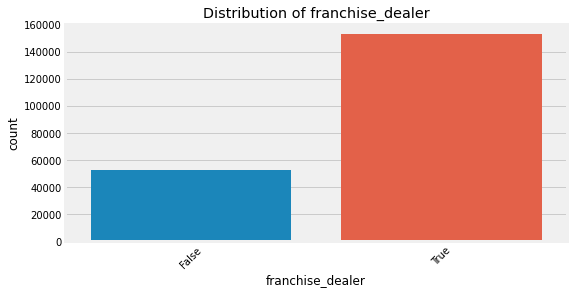

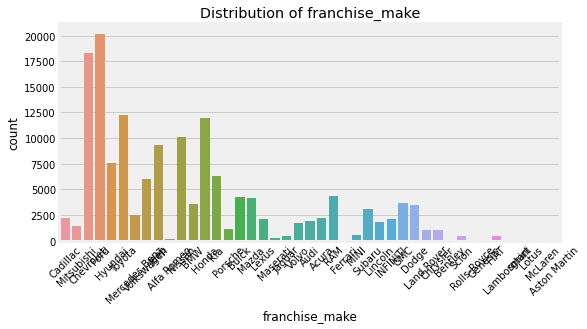

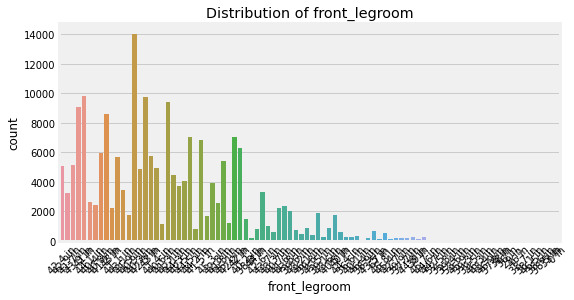

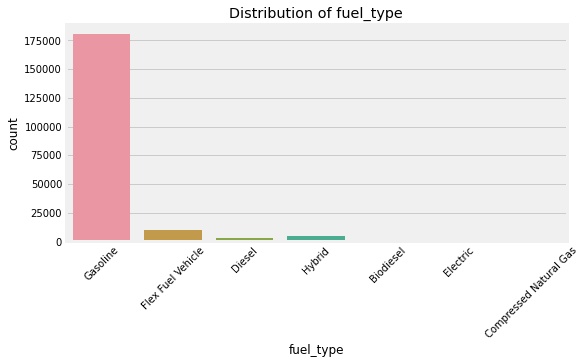

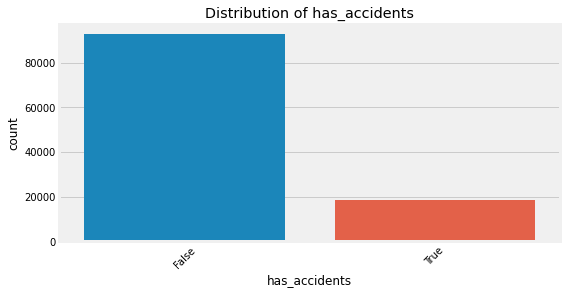

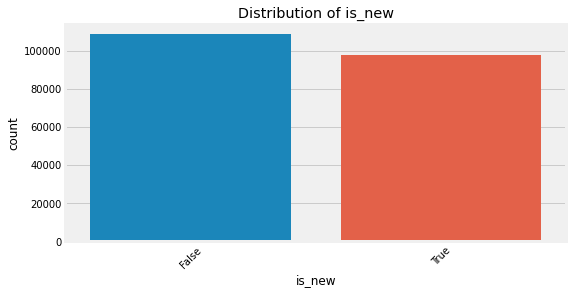

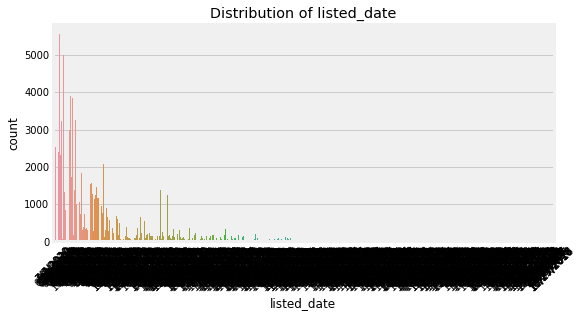

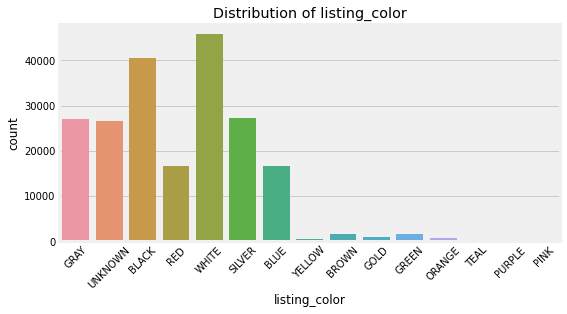

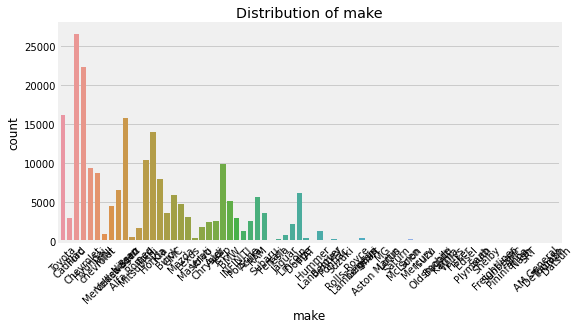

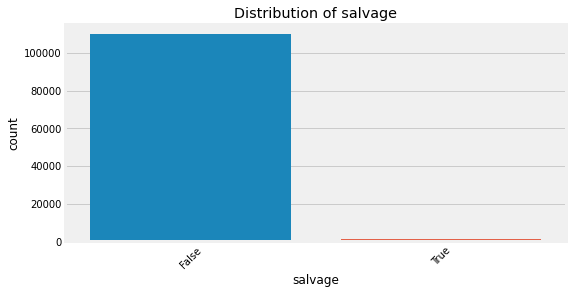

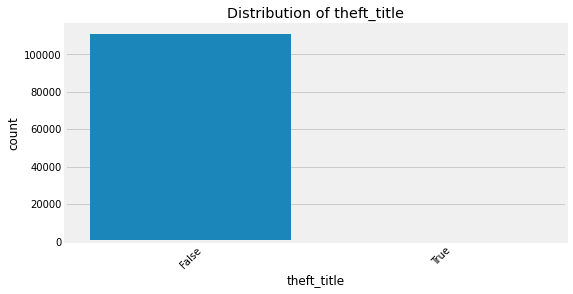

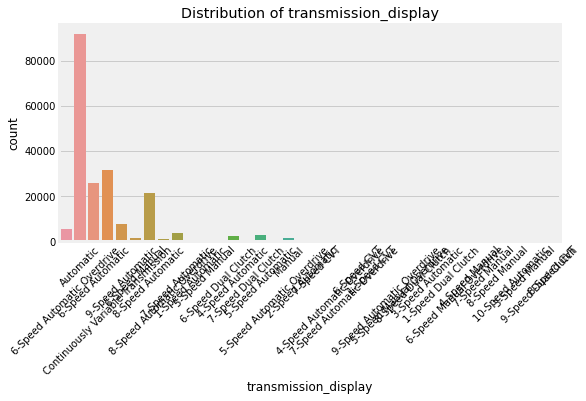

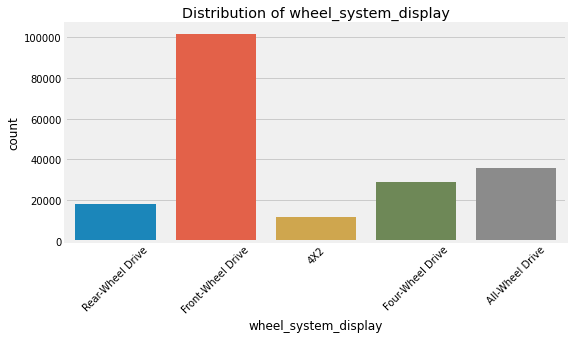

In [ ]:
#drop irrelevant colulmns
columns_to_drop = ['listing_id', 'model', 'interior_color', 'exterior_color', 'major_options', 'main_picture_url']
car_sales = car_sales.drop(columns=columns_to_drop)

#create list of the categorical (qualitative data) columns
categorical_cols = car_sales.select_dtypes(include=['object']).columns

#plot distribution of each of the categorival columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=car_sales, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

Some of the categorical variables have very many categories that is why i removed some of them. Even though i eliminated some of them we see that still some categorical variables have many levels

#### Correlations

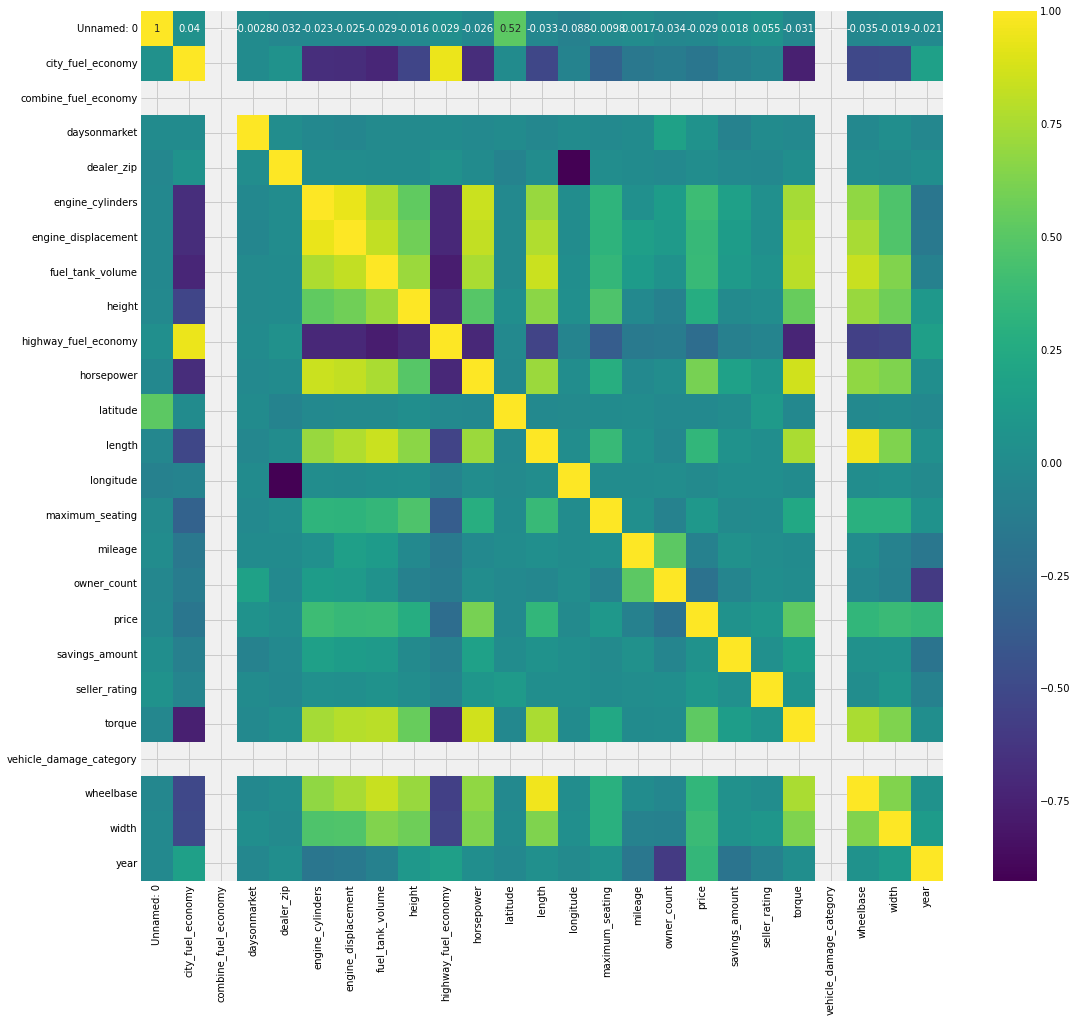

In [ ]:
#create correlation heatmap
fig = plt.figure(figsize = (16,16))
sns.heatmap(car_sales.corr(), cmap="viridis", annot=True)
plt.show()

#### Selecting numerical variables that are correlated with price

In [ ]:
#print correlations between price and other variablesif correlation more than0.2
correlation_matrix = car_sales.corr()
for row in correlation_matrix:
    for col in correlation_matrix:
        if row == "price":
            if abs(correlation_matrix.loc[row,col]) > .2:
                print(f"Correlation between '{row}' and '{col}': {correlation_matrix.loc[row, col]}")

Correlation between 'price' and 'engine_cylinders': 0.39350971634712734
Correlation between 'price' and 'engine_displacement': 0.36091841107986633
Correlation between 'price' and 'fuel_tank_volume': 0.37488181651254077
Correlation between 'price' and 'height': 0.26606136184621243
Correlation between 'price' and 'highway_fuel_economy': -0.24172231765823332
Correlation between 'price' and 'horsepower': 0.6064399717807304
Correlation between 'price' and 'length': 0.3399755950799866
Correlation between 'price' and 'owner_count': -0.20245133852380584
Correlation between 'price' and 'price': 1.0
Correlation between 'price' and 'torque': 0.5227577511252031
Correlation between 'price' and 'wheelbase': 0.33851059313132675
Correlation between 'price' and 'width': 0.381039786195075
Correlation between 'price' and 'year': 0.3490950766035976


The named variables above indicate that only few of them were correlated with price.

#### ANOVA test for all the categorical versus the price of cars

In [ ]:
#create a list of categorical variables for anova
categorical_variables = []
for col in car_sales.columns:
    if car_sales[col].dtype == "object":
        categorical_variables.append(col)
print(categorical_variables)

['city', 'bed', 'body_type', 'engine_type', 'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom', 'fuel_type', 'has_accidents', 'is_new', 'listed_date', 'listing_color', 'make', 'salvage', 'theft_title', 'transmission_display', 'wheel_system_display']


In [ ]:
#run the anova tests
for var in categorical_variables:
    grouped_data = car_sales.groupby(var)['price']
    f_statistic, p_value = stats.f_oneway(*[group for _, group in grouped_data])

    #print results
    print(f"ANOVA for {var}:")
    print(f"F-Statistic: {f_statistic}")
    print(f"P-Value: {p_value}")
    print('\n')

ANOVA for city:
F-Statistic: 76.76219769116076
P-Value: 0.0


ANOVA for bed:
F-Statistic: 15.741728171988767
P-Value: 1.7022122956459035e-07


ANOVA for body_type:
F-Statistic: 3073.3048279617096
P-Value: 0.0


ANOVA for engine_type:
F-Statistic: 2232.7500492133554
P-Value: 0.0


ANOVA for frame_damaged:
F-Statistic: 368.3532866990784
P-Value: 5.8013249057035e-82


ANOVA for franchise_dealer:
F-Statistic: 20634.433422615894
P-Value: 0.0


ANOVA for franchise_make:
F-Statistic: 1979.9346692929068
P-Value: 0.0


ANOVA for front_legroom:
F-Statistic: 840.2639171385578
P-Value: 0.0


ANOVA for fuel_type:
F-Statistic: 746.380568171042
P-Value: 0.0


ANOVA for has_accidents:
F-Statistic: 2573.846355831347
P-Value: 0.0


ANOVA for is_new:
F-Statistic: 29163.085593097658
P-Value: 0.0


ANOVA for listed_date:
F-Statistic: 5.469744424982579
P-Value: 0.0


ANOVA for listing_color:
F-Statistic: 214.03005945135013
P-Value: 0.0


ANOVA for make:
F-Statistic: nan
P-Value: nan


ANOVA for salvage:
F-S

With ANOVA we see that price was significant for most of the variables Except for make. This means that the other variables can be used to predict price

# Part 2: Preprocessing

### Data cleaning

In [ ]:
#remove columns with only null values
car_df = car_sales.dropna(axis=1, how='all')

In [ ]:
#data summary
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215646 entries, 0 to 215645
Data columns (total 41 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            215646 non-null  int64  
 1   city                  206239 non-null  object 
 2   bed                   1575 non-null    object 
 3   body_type             205308 non-null  object 
 4   city_fuel_economy     173883 non-null  float64
 5   daysonmarket          206239 non-null  float64
 6   dealer_zip            206239 non-null  float64
 7   engine_cylinders      199075 non-null  float64
 8   engine_displacement   194191 non-null  float64
 9   engine_type           199075 non-null  object 
 10  frame_damaged         111298 non-null  object 
 11  franchise_dealer      206239 non-null  object 
 12  franchise_make        152719 non-null  object 
 13  front_legroom         195319 non-null  object 
 14  fuel_tank_volume      195228 non-null  float64
 15  

In [ ]:
#remove some of the variables that are not useful in predicting price.
columns_to_drop1 = ['mileage', 'Unnamed: 0', 'make', 'listed_date']

#drop the variables
car_df1 = car_df.drop(columns=columns_to_drop1)

In [ ]:
#choose the numerical variables that are best for predicting price
selected_columns = ['engine_cylinders', 'engine_displacement', 'fuel_tank_volume', 'height', 'highway_fuel_economy', 'horsepower', 'length', 'owner_count', 'price', 'torque', 'wheelbase', 'width', 'year']

#identify and collect the categorial variables
categorical_variables1 = []
for col in car_df1.columns:
    if car_df1[col].dtype == "object":
        categorical_variables1.append(col)
print(categorical_variables1)

#createa new dataframe from the numerical and categorical variable lists
car_df2 = car_df1[selected_columns + categorical_variables1]

['city', 'bed', 'body_type', 'engine_type', 'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom', 'fuel_type', 'has_accidents', 'is_new', 'listing_color', 'salvage', 'theft_title', 'transmission_display', 'wheel_system_display']


In [ ]:
#summary of new dataframe
car_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215646 entries, 0 to 215645
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   engine_cylinders      199075 non-null  float64
 1   engine_displacement   194191 non-null  float64
 2   fuel_tank_volume      195228 non-null  float64
 3   height                195290 non-null  float64
 4   highway_fuel_economy  173883 non-null  float64
 5   horsepower            194191 non-null  float64
 6   length                195290 non-null  float64
 7   owner_count           105550 non-null  float64
 8   price                 206239 non-null  float64
 9   torque                171797 non-null  float64
 10  wheelbase             195293 non-null  float64
 11  width                 195289 non-null  float64
 12  year                  206239 non-null  float64
 13  city                  206239 non-null  object 
 14  bed                   1575 non-null    object 
 15  

#### Fill nans appropriately

In [ ]:
#calculate percentage of missing values for each column
missing_percentage = (car_df2.isnull().sum() / len(car_df2)) * 100

#display the percentage of missing values for each column
print("Percentage of missing values for each column:")
print(missing_percentage)

Percentage of missing values for each column:
engine_cylinders         7.684353
engine_displacement      9.949176
fuel_tank_volume         9.468295
height                   9.439544
highway_fuel_economy    19.366462
horsepower               9.949176
length                   9.439544
owner_count             51.054042
price                    4.362242
torque                  20.333788
wheelbase                9.438153
width                    9.440008
year                     4.362242
city                     4.362242
bed                     99.269636
body_type                4.793968
engine_type              7.684353
frame_damaged           48.388563
franchise_dealer         4.362242
franchise_make          29.180694
front_legroom            9.426096
fuel_type                7.079195
has_accidents           48.388563
is_new                   4.362242
listing_color            4.362242
salvage                 48.388563
theft_title             48.388563
transmission_display     6.779166
wh

In [ ]:
#drop variables with over 20% missing values

#threshold for dropping variables based on percentage of missing values
threshold = 20

#filter columns with over 20% missing values
columns_to_drop = missing_percentage[missing_percentage > threshold].index

#drop the selected columns from dataframe
car_df2.drop(columns=columns_to_drop, inplace=True)

#display the remaining columns
print("Remaining columns after dropping variables with over 20% missing values:")
print(car_df2.columns)


Remaining columns after dropping variables with over 20% missing values:
Index(['engine_cylinders', 'engine_displacement', 'fuel_tank_volume', 'height',
       'highway_fuel_economy', 'horsepower', 'length', 'price', 'torque',
       'wheelbase', 'width', 'year', 'city', 'body_type', 'engine_type',
       'franchise_dealer', 'front_legroom', 'fuel_type', 'is_new',
       'listing_color', 'transmission_display', 'wheel_system_display'],
      dtype='object')


In [ ]:
#show updated dataframe summary
car_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215646 entries, 0 to 215645
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   engine_cylinders      199075 non-null  float64
 1   engine_displacement   194191 non-null  float64
 2   fuel_tank_volume      195228 non-null  float64
 3   height                195290 non-null  float64
 4   highway_fuel_economy  173883 non-null  float64
 5   horsepower            194191 non-null  float64
 6   length                195290 non-null  float64
 7   price                 206239 non-null  float64
 8   torque                171797 non-null  float64
 9   wheelbase             195293 non-null  float64
 10  width                 195289 non-null  float64
 11  year                  206239 non-null  float64
 12  city                  206239 non-null  object 
 13  body_type             205308 non-null  object 
 14  engine_type           199075 non-null  object 
 15  

In [ ]:
#import imputation libraries
from sklearn.impute import SimpleImputer

#impute missing values in numeric variables with mean of every lcolumn
numeric_imputer = SimpleImputer(strategy='mean')
numeric_columns = car_df2.select_dtypes(include=['float64']).columns
car_df2[numeric_columns] = numeric_imputer.fit_transform(car_df2[numeric_columns])

#impute missing values in categorical variables with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = car_df2.select_dtypes(include=['object']).columns
car_df2[categorical_columns] = categorical_imputer.fit_transform(car_df2[categorical_columns])

#display first 5 rows of updated dataframe
print(car_df2.head())

   engine_cylinders  engine_displacement  fuel_tank_volume     height  \
0               8.0          2931.007101         18.382488  65.279461   
1               4.0          2000.000000         17.400000  57.200000   
2               6.0          3500.000000         18.600000  70.000000   
3               4.0          2931.007101         18.382488  65.279461   
4               4.0          1400.000000          9.000000  58.400000   

   highway_fuel_economy  horsepower      length    price      torque  \
0             29.817872  245.658367  192.675968  13900.0  261.121713   
1             32.000000  237.000000  193.800000  43960.0  405.000000   
2             24.000000  290.000000  198.300000  27300.0  255.000000   
3             35.000000  245.658367  192.675968  15198.0  261.121713   
4             38.000000   98.000000  143.100000  15495.0  261.121713   

   wheelbase      width    year        city        body_type engine_type  \
0  114.57791  77.937246  2008.0      Denver     Pick

In [ ]:
#display summary of updated dataframe
car_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215646 entries, 0 to 215645
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   engine_cylinders      215646 non-null  float64
 1   engine_displacement   215646 non-null  float64
 2   fuel_tank_volume      215646 non-null  float64
 3   height                215646 non-null  float64
 4   highway_fuel_economy  215646 non-null  float64
 5   horsepower            215646 non-null  float64
 6   length                215646 non-null  float64
 7   price                 215646 non-null  float64
 8   torque                215646 non-null  float64
 9   wheelbase             215646 non-null  float64
 10  width                 215646 non-null  float64
 11  year                  215646 non-null  float64
 12  city                  215646 non-null  object 
 13  body_type             215646 non-null  object 
 14  engine_type           215646 non-null  object 
 15  

### Feature engineering

In [ ]:
#import libraries for preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

#categorical variables to integers
label_encoder = LabelEncoder()
for column in categorical_columns:
    car_df2[column] = label_encoder.fit_transform(car_df2[column])

#standard the numerical variables to have mean of 0 and standard deviation of 1
scaler = StandardScaler()
car_df2[numeric_columns] = scaler.fit_transform(car_df2[numeric_columns])

#show the first five rows of updated dataframe
print(car_df2.head())

   engine_cylinders  engine_displacement  fuel_tank_volume        height  \
0          2.074799         3.621765e-16          0.000000  3.970720e-15   
1         -0.786316        -7.414862e-01         -0.194560 -1.128760e+00   
2          0.644241         4.531656e-01          0.043073  6.594936e-01   
3         -0.786316         3.621765e-16          0.000000  3.970720e-15   
4         -0.786316        -1.219347e+00         -1.857991 -9.611108e-01   

   highway_fuel_economy  horsepower        length     price        torque  \
0         -4.987370e-16    0.000000  1.527337e-15 -0.751344 -5.468965e-16   
1          3.063315e-01   -0.100006  6.040368e-02  0.726239  1.384268e+00   
2         -8.167244e-01    0.512157  3.022264e-01 -0.092674 -5.889765e-02   
3          7.274775e-01    0.000000  1.527337e-15 -0.687541 -5.468965e-16   
4          1.148623e+00   -1.705492 -2.664132e+00 -0.672942 -5.468965e-16   

      wheelbase         width      year  city  body_type  engine_type  \
0  3.23

# Part 3: Regression

#### First model

In [ ]:
#import libary for statistic modeling
import statsmodels.api as sm

In [ ]:
#define target variable
target_variable = 'price'
y = car_df2[target_variable]

#feature variables and add a constant
X = car_df2.drop(columns=['price'])
X = sm.add_constant(X)

#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fit least squares regression into training data
model = sm.OLS(y_train, X_train).fit()

#display summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                 1.075e+04
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:44:20   Log-Likelihood:            -1.7388e+05
No. Observations:              172516   AIC:                         3.478e+05
Df Residuals:                  172494   BIC:                         3.480e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.2132 

### Decision tree model

In [ ]:
#import libraries for decision tree modeling tuning
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


#separate price variable from the feature variabvles
X = car_df2.drop(columns=['price'])
y = car_df2['price']

#split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#define preprocessing steps for numeric variables
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

#define preprocessing steps for categorical variables
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

#combine the preprocessing steps for both numeric and categorical variables
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, X.select_dtypes(include=['float64']).columns),('cat', categorical_transformer, X.select_dtypes(include=['object']).columns)])

#define the model witht he preprocessing and decision tree modeling including
dt_model = Pipeline(steps=[('preprocessor', preprocessor),('regressor', DecisionTreeRegressor())])

#define the hyperparameters for grid search
param_grid = {'regressor__max_depth': [3, 5, 7, 10], 'regressor__min_samples_split': [2, 5, 10], 'regressor__min_samples_leaf': [1, 2, 4]}

# Perform GridSearchCV to find best hyperparameters
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

#display best parameters
print("Best parameters found:", grid_search.best_params_)

#display best r^2 score
print("Best R^2 score on validation data:", grid_search.best_score_)

#test it on test data
test_score = grid_search.best_estimator_.score(X_test, y_test)

#display test data r^2 score
print("R^2 score on test data:", test_score)

Best parameters found: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 2}
Best R^2 score on validation data: 0.7783046968321543
R^2 score on test data: 0.8180609618519045


# Part 4: Summary

After fitting the models i looked at the R2 to find the best one, for Linear regression the best model had 56.7 as the R2. For the decision tree the model performed better with an R2 score of 81.8. From this we see that with Grid search gave the best model from the decision tree.